In [70]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Time series analysis - ARIMA and Exponential Smoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Model evaluation - error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# pmdarima for ARIMA automatic parameter tuning (optional)
# !pip install pmdarima
import pmdarima as pm
from pmdarima import auto_arima

#Setting Parameters 
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (30,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\priya\Downloads\Timeseries for assign\Timeseries\exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [3]:
# to check the missing values in the dataset
df.describe(include='all')

,date,Ex_rate
count,7588,7588.000000
unique,7588,NaN
top,01-01-1990 00:00,NaN
freq,1,NaN
mean,NaN,0.776974
std,NaN,0.136620
min,NaN,0.483297
25%,NaN,0.701422
50%,NaN,0.761377
75%,NaN,0.873477


In [4]:
 df.isna().sum()

date       0
Ex_rate    0
dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date       datetime64[ns]
Ex_rate           float64
dtype: object

In [6]:
df.set_index('date',inplace=True)
df['Rolling Mean'] = df['Ex_rate'].rolling(window=12).mean()
df['Rolling std'] = df['Ex_rate'].rolling(window=12).std()
df.head(12)

,Ex_rate,Rolling Mean,Rolling std
date,,,
1990-01-01,0.7855,NaN,NaN
1990-02-01,0.7818,NaN,NaN
1990-03-01,0.7867,NaN,NaN
1990-04-01,0.7860,NaN,NaN
1990-05-01,0.7849,NaN,NaN
1990-06-01,0.7866,NaN,NaN
1990-07-01,0.7886,NaN,NaN
1990-08-01,0.7910,NaN,NaN
1990-09-01,0.7939,NaN,NaN


In [7]:
df

,Ex_rate,Rolling Mean,Rolling std
date,,,
1990-01-01,0.785500,NaN,NaN
1990-02-01,0.781800,NaN,NaN
1990-03-01,0.786700,NaN,NaN
1990-04-01,0.786000,NaN,NaN
1990-05-01,0.784900,NaN,NaN
...,...,...,...
2010-06-10,0.718494,0.722488,0.004438
2010-07-10,0.721839,0.721832,0.003811
2010-08-10,0.723197,0.721288,0.002953


Text(0, 0.5, 'Values')

<Figure size 2500x1500 with 0 Axes>

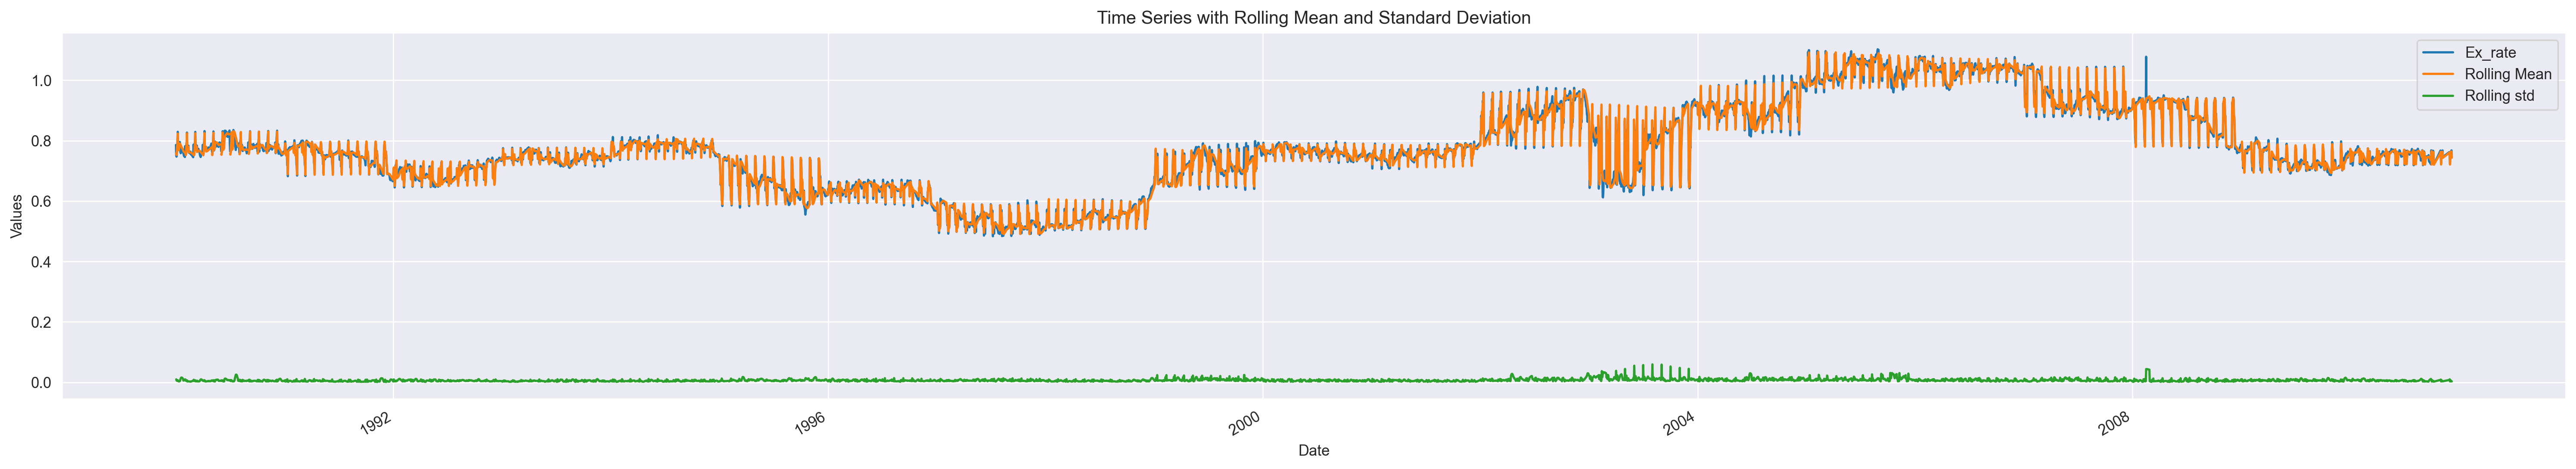

In [8]:
plt.figure(figsize=(10, 6))
df.plot()
plt.title('Time Series with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Values')

In [18]:
def adf_values(dataframe,var):
    # Perform the ADF test
    from statsmodels.tsa.stattools import adfuller
    adf_result = adfuller(dataframe[var])
    # Creating a dictionary to store the ADF test results in an interpretable format
    adf_dict = {
    'Test Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Lags Used': adf_result[2],
    'Number of Observations Used': adf_result[3],
    'Critical Values': adf_result[4],
    'IC Best': adf_result[5],} # Information Criterion if autolag is used}
    print(adf_dict)

In [19]:
#USing the function to printing the different values by adfuller()
adf_values(df,'Ex_rate')

{'Test Statistic': -1.664994180738073, 'p-value': 0.44923273535983155, 'Lags Used': 1, 'Number of Observations Used': 7586, 'Critical Values': {'1%': -3.4312123140180137, '5%': -2.861921078147796, '10%': -2.5669728434336108}, 'IC Best': -55835.06254628545}


In [20]:
# Perform the ADF test
adf_result = adfuller(df['Ex_rate'])

if adf_result[1]>0.05:
    print("Data is not stationary")
else:
    print("Data is stationary")

Data is not stationary


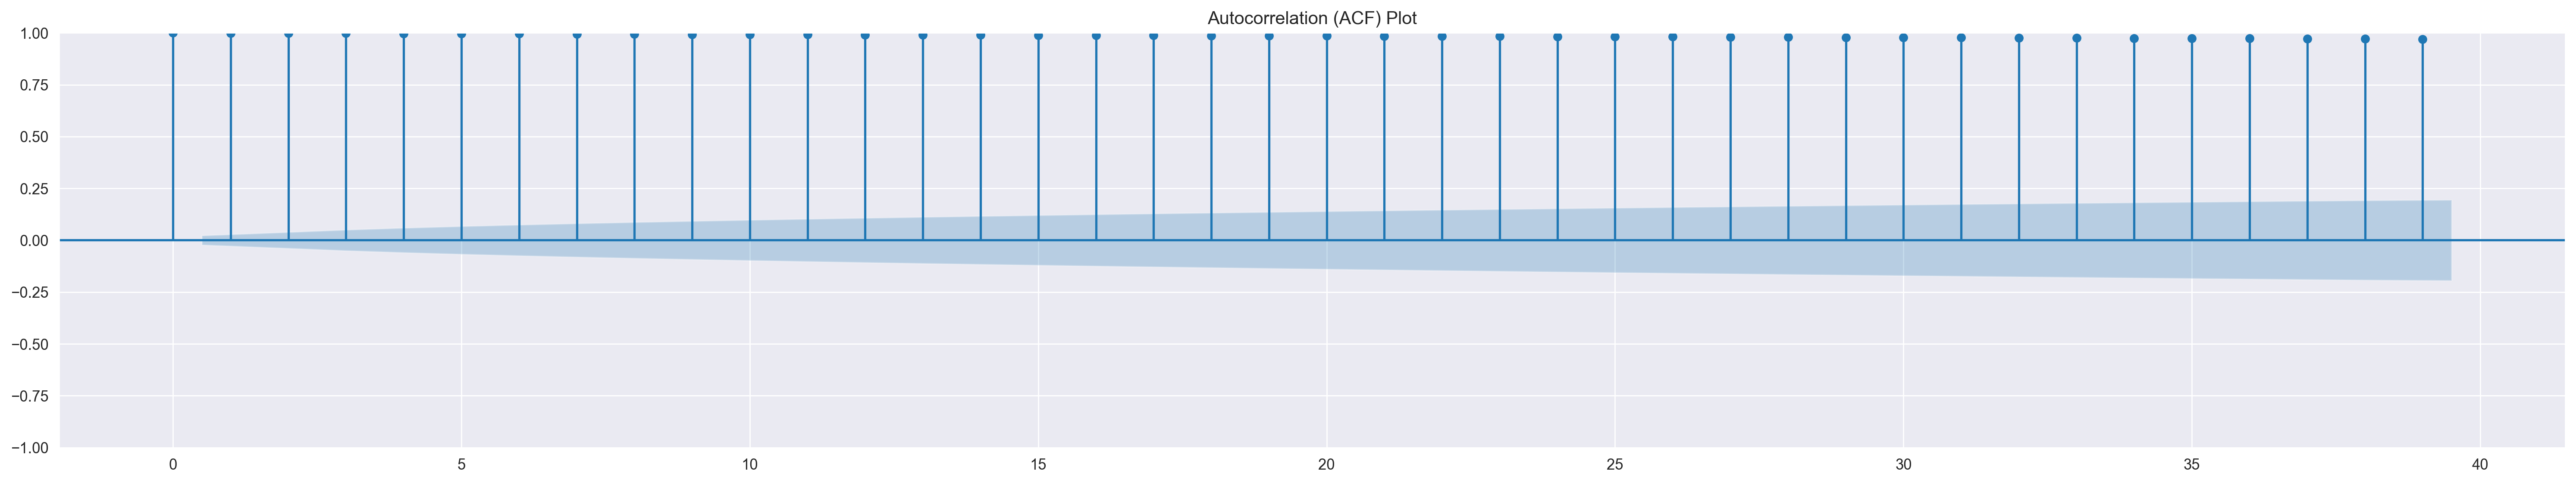

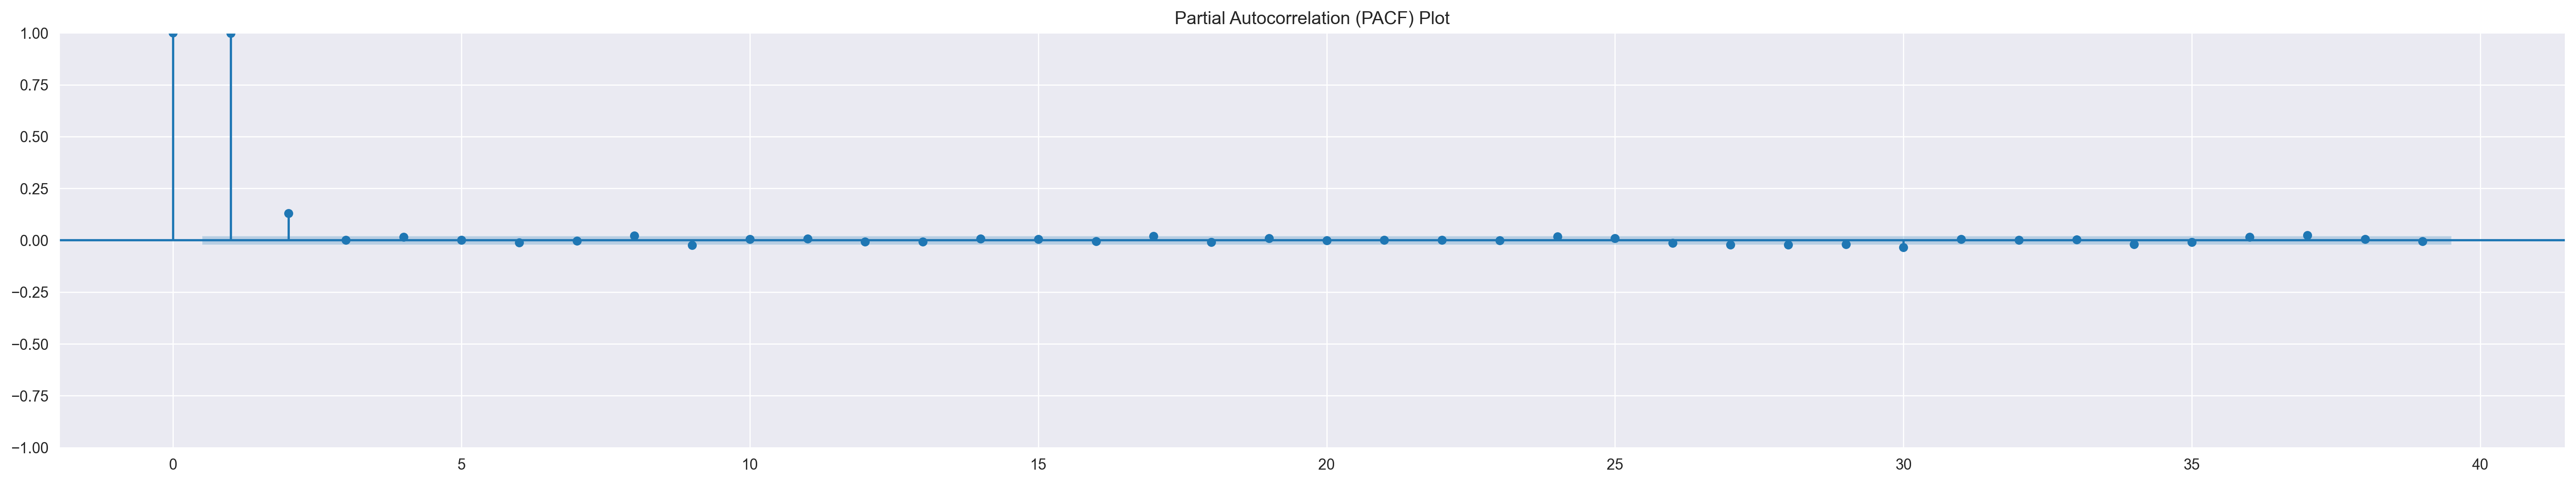

In [21]:
# ACf and Pacf for checking if the data is stationary or not 
# ACF Plot
plot_acf(df['Ex_rate'])
plt.title('Autocorrelation (ACF) Plot')
plt.show()

# PACF Plot
plot_pacf(df['Ex_rate'])
plt.title('Partial Autocorrelation (PACF) Plot')
plt.show()

In [22]:
#Differincg out to make my time series forcasting data stationary
Arima_df = df
Arima_df['First Shift'] = df['Ex_rate'].shift()
Arima_df['First Shift Diff'] = Arima_df['Ex_rate'] - Arima_df['First Shift']
Arima_df

,Ex_rate,Rolling Mean,Rolling std,First Shift,First Shift Diff
date,,,,,
1990-01-01,0.785500,NaN,NaN,NaN,NaN
1990-02-01,0.781800,NaN,NaN,0.785500,-0.003700
1990-03-01,0.786700,NaN,NaN,0.781800,0.004900
1990-04-01,0.786000,NaN,NaN,0.786700,-0.000700
1990-05-01,0.784900,NaN,NaN,0.786000,-0.001100
...,...,...,...,...,...
2010-06-10,0.718494,0.722488,0.004438,0.718701,-0.000207
2010-07-10,0.721839,0.721832,0.003811,0.718494,0.003345
2010-08-10,0.723197,0.721288,0.002953,0.721839,0.001358


In [40]:
def plotandAdf_TimeSeries(dataframe,var):
    Clean_df = Arima_df.dropna()

    result_adf = adfuller(Clean_df[var])
    stats = pd.Series(result_adf[0:4], index=['Test Statistic:', 'p-value:', 'Lags Used:', 'Number of Observations Used:'])
    print(stats)
    # sns.lineplot(data = dataframe.dropna(),x=dataframe.index,y=dataframe[var])
    # sns.lineplot(data=dataframe.dropna(),x=dataframe.index,y=dataframe['Rolling Mean'])
    # sns.lineplot(data=dataframe.dropna(),x=dataframe.index,y=dataframe['Rolling std'])
    Arima_df.dropna().plot()

Test Statistic:                  -99.321395
p-value:                           0.000000
Lags Used:                         0.000000
Number of Observations Used:    7576.000000
dtype: float64


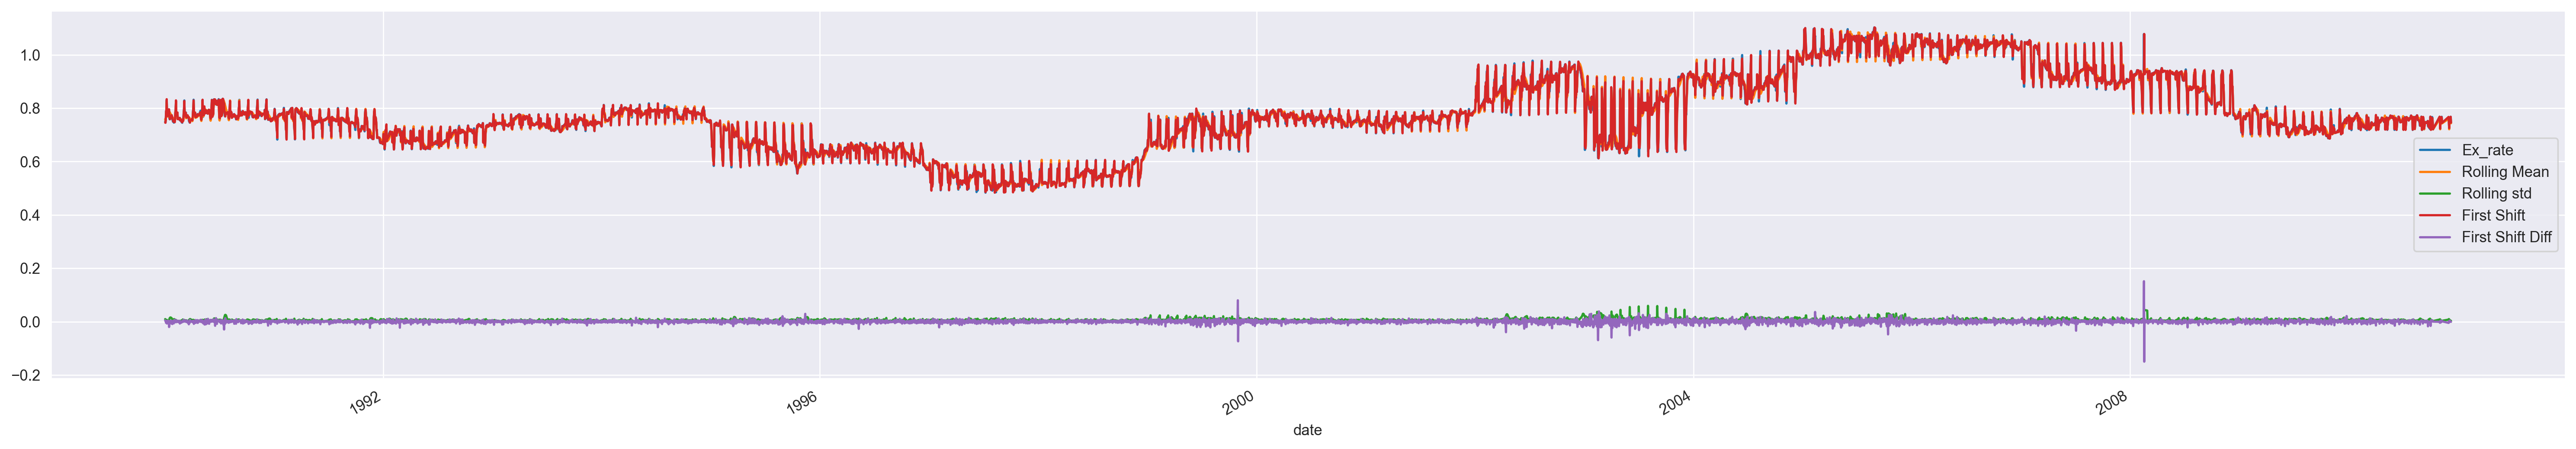

In [41]:
plotandAdf_TimeSeries(Arima_df,'First Shift Diff')

In [ ]:
# result_adf = adfuller(Arima_df['First Shift Diff'].dropna())
# stats = pd.Series(result_adf[0:4], index=['Test Statistic:', 'p-value:', 'Lags Used:', 'Number of Observations Used:'])
# print(stats)


{'Test Statistic': -14.797630732244023, 'p-value': 2.12350359890095e-27, 'Lags Used': 28, 'Number of Observations Used': 7548, 'Critical Values': {'1%': -3.431216656769291, '5%': -2.8619229970384334, '10%': -2.566973864884945}, 'IC Best': -52168.267101643316}


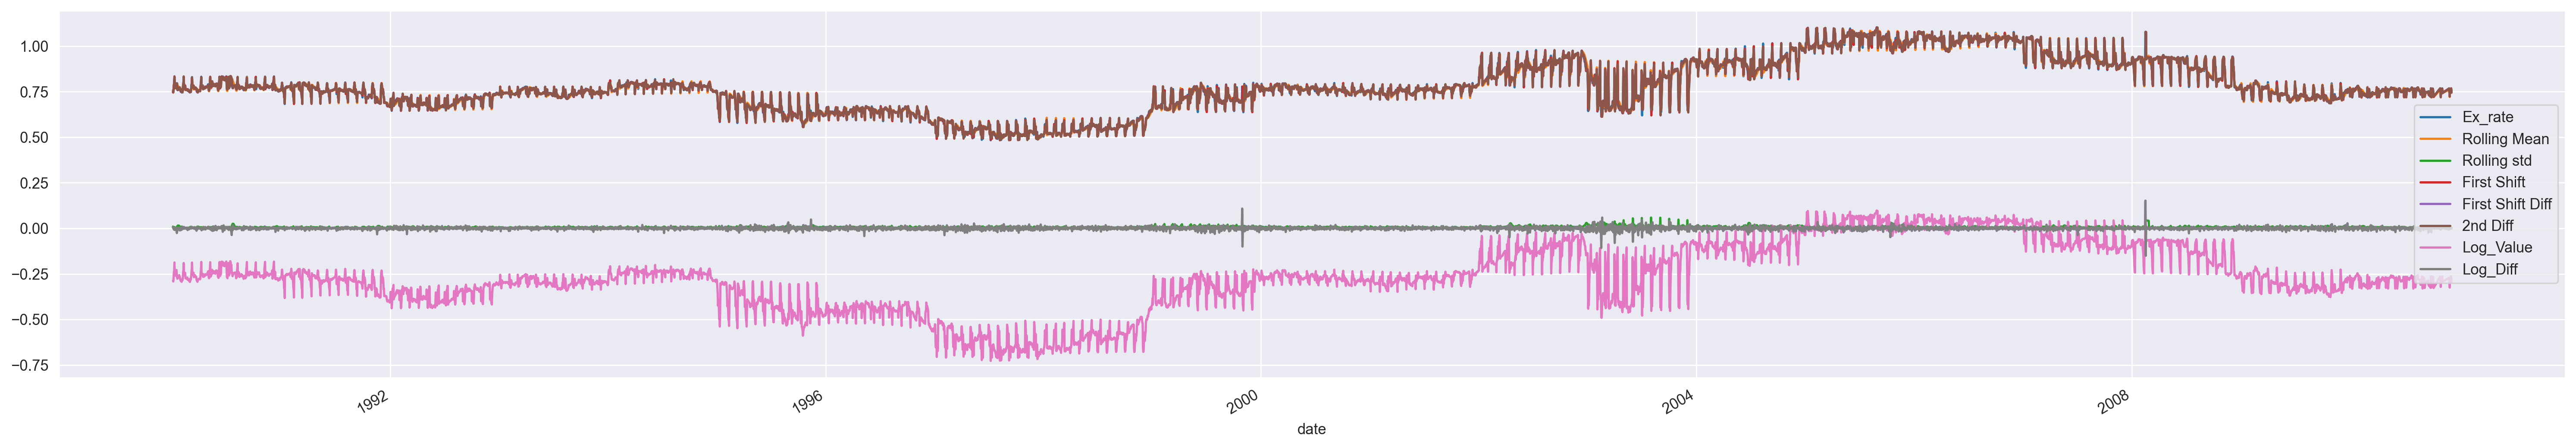

In [46]:
#2nd value differencing
Arima_df['2nd Diff'] = Arima_df['First Shift'].shift()

# Apply log transformation (ensure all values are positive before applying log)
Arima_df['Log_Value'] = np.log(Arima_df['Ex_rate'])

# Differencing after log transformation (to remove trend after stabilizing variance)
Arima_df['Log_Diff'] =Arima_df['Log_Value'].diff()
Arima_df.dropna().plot()


# The function to print the adfuller value and to plot the graph to check the stationarity of the timeseries data 
adf_values(Arima_df.dropna(),'Log_Diff')


Here we can conclude that the 1st order Shift differencing made our data stationary so we can further proceed to model building

In [53]:
order = auto_arima(Arima_df['First Shift Diff'].dropna())
print(order)

 ARIMA(1,0,0)(0,0,0)[0]          


In [54]:
df.shape

(7588, 8)

In [55]:
# Split data into train and test sets
train_size = int(len(Arima_df) * 0.8)
train, test = Arima_df[:train_size], Arima_df[train_size:]

In [63]:
train.shape,test.shape

((6070, 8), (1518, 8))

In [59]:
model = ARIMA(train['First Shift Diff'], order=(1, 0, 0)).fit()

In [66]:
Y_pred =  model.predict(start=6071,end=7588)
Y_pred


6071    0.000039
6072    0.000039
6073    0.000039
6074    0.000039
6075    0.000039
          ...   
7584    0.000039
7585    0.000039
7586    0.000039
7587    0.000039
7588    0.000039
Name: predicted_mean, Length: 1518, dtype: float64

In [67]:
print(np.sqrt(mean_squared_error(test['First Shift Diff'], Y_pred)))

0.007146047020663135


In [71]:
r2_score(test['First Shift Diff'],Y_pred)

-0.0011149566049872828